In [2]:
import pandas as pd
import retinaface
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import textblob
from wordcloud import WordCloud,STOPWORDS
from tqdm.notebook import tqdm

### Read Data

In [3]:
df1 = pd.read_csv('drugsComTest_raw.tsv', sep = '\t' , index_col=  'Unnamed: 0')
df2 = pd.read_csv('drugsComTrain_raw.tsv', sep = '\t', index_col=  'Unnamed: 0')
df = pd.concat([df1,df2])
df['rating']=df['rating'].astype('int8')

df.head()

,drugName,condition,review,rating,date,usefulCount
163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,"February 28, 2012",22
206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,"May 17, 2009",17
159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,"September 29, 2017",3
39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,"March 5, 2017",35
97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,"October 22, 2015",4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 163740 to 215220
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   drugName     215063 non-null  object        
 1   condition    213869 non-null  object        
 2   review       215063 non-null  object        
 3   rating       215063 non-null  int8          
 4   date         215063 non-null  datetime64[ns]
 5   usefulCount  215063 non-null  int64         
dtypes: datetime64[ns](1), int64(1), int8(1), object(3)
memory usage: 10.0+ MB


## Delete missing values
موارد خالی را حذف میکنیم **dropna()** با استفاده از تابع  

In [9]:
df = df.dropna()
df['usefulCount']=df['usefulCount'].astype('int32')


In [10]:
df.describe()

,rating,usefulCount
count,213869.000000,213869.000000
mean,6.991149,28.094118
std,3.275792,36.401377
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


### Using textblob
adding sentiment to df

Polarity

In [7]:
df['sentimentPolarity'] = df['review'].apply(lambda x: textblob.TextBlob(x).sentiment.polarity)
df.head()

,drugName,condition,review,rating,date,usefulCount,sentimentPolarity
163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22,0.000000
206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17,0.566667
159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3,0.333333
39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35,0.139063
97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4,0.260926


Subjectivity

In [8]:
df['sentimentSubjectivity'] = df['review'].apply(lambda x: textblob.TextBlob(x).sentiment.subjectivity)
df.head()

,drugName,condition,review,rating,date,usefulCount,sentimentPolarity,sentimentSubjectivity
163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22,0.000000,0.440000
206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17,0.566667,0.600000
159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3,0.333333,0.500000
39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35,0.139063,0.500000
97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4,0.260926,0.550463


In [9]:
df.describe()

,rating,usefulCount,sentimentPolarity,sentimentSubjectivity
count,213869.000000,213869.000000,213869.000000,213869.000000
mean,6.991149,28.094118,0.064578,0.499609
std,3.275792,36.401377,0.222315,0.174873
min,1.000000,0.000000,-1.000000,0.000000
25%,5.000000,6.000000,-0.043869,0.408333
50%,8.000000,16.000000,0.057500,0.501157
75%,10.000000,36.000000,0.173333,0.600000
max,10.000000,1291.000000,1.000000,1.000000


In [10]:
positive = len(df[df['sentimentPolarity'] >= 0.33])
negative = len(df[df['sentimentPolarity'] <= -0.33])
neutral = len(df[(df['sentimentPolarity'] > -0.33) & (df['sentimentPolarity'] < 0.33)])


In [11]:
df = df.drop(['Unnamed: 0'] , axis= 1)
df

,drugName,condition,review,rating,date,usefulCount,sentimentPolarity,sentimentSubjectivity
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22,0.000000,0.440000
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17,0.566667,0.600000
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3,0.333333,0.500000
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35,0.139063,0.500000
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4,0.260926,0.550463
...,...,...,...,...,...,...,...,...
161292,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125,0.262917,0.449167
161293,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34,-0.276389,0.759722
161294,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35,-0.223810,0.369841
161295,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79,0.212597,0.473143


## Patterns between drugs and sentiments

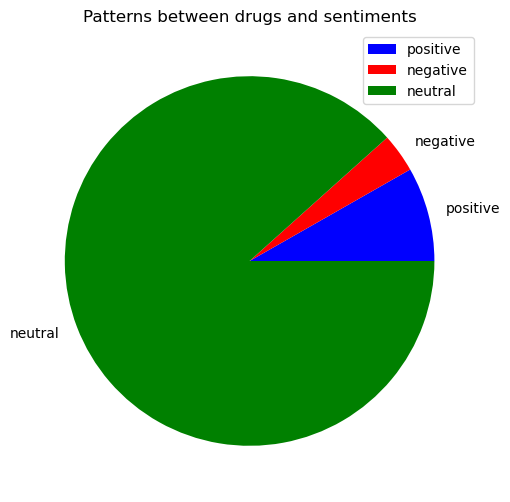

In [11]:
plt.figure(figsize=(8,6))
plt.pie([positive , negative, neutral] , labels=["positive","negative","neutral"] ,colors=["b","r","g"])
plt.title('Patterns between drugs and sentiments')
plt.legend()
plt.show()

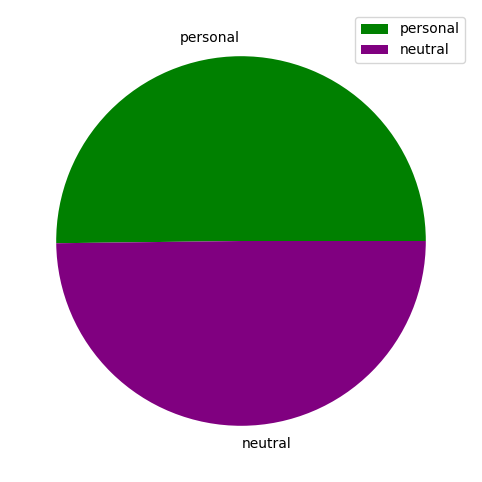

In [12]:
personal = len(df[df['sentimentSubjectivity'] > 0.5]) # personal = len(df[df['sentimentSubjectivity'].between(0.5,1)])
neutral1 = len(df[df['sentimentSubjectivity'] <= 0.5]) # neutral1 = len(df[df['sentimentSubjectivity'].between(0 , 0.5)])
plt.figure(figsize=(8,6))
plt.pie([personal , neutral1] , labels=('personal','neutral'), colors=('green','purple'))
plt.legend()
plt.show()

### Plot

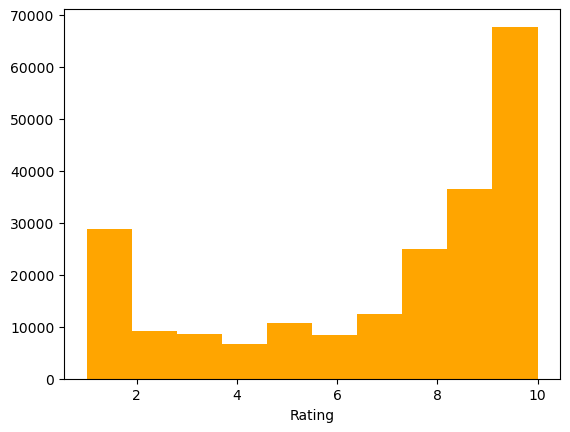

In [13]:
plt.Figure(figsize=(6,4))
plt.hist(df.rating,color='orange')
plt.xlabel('Rating')
plt.show()

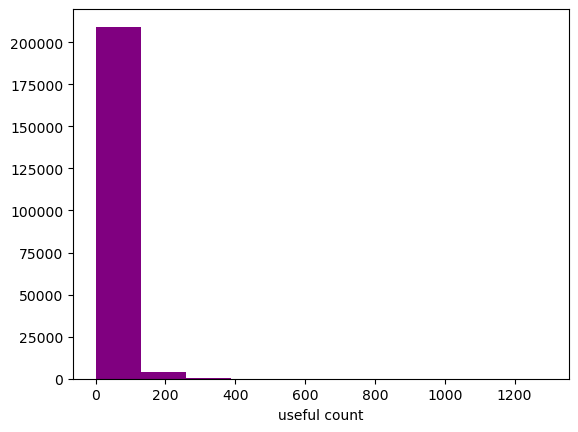

In [17]:
plt.Figure(figsize=(6,4))
plt.hist(df.usefulCount,color="purple")
plt.xlabel('useful count')
plt.show()

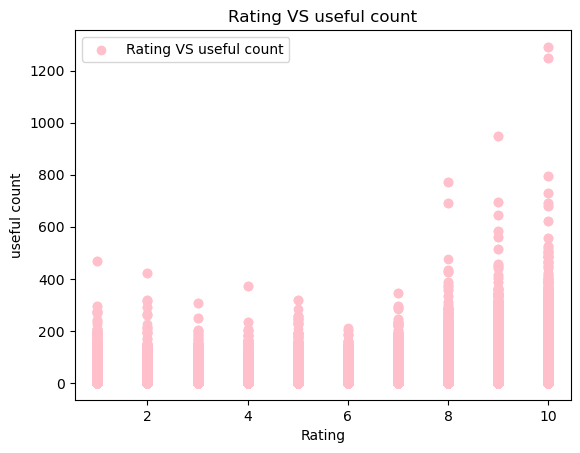

In [18]:
plt.Figure(figsize=(6,4))
plt.scatter(df.rating,df.usefulCount,color='pink',label = 'Rating VS useful count')
plt.xlabel('Rating')
plt.ylabel('useful count')
plt.title('Rating VS useful count')
plt.legend()
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

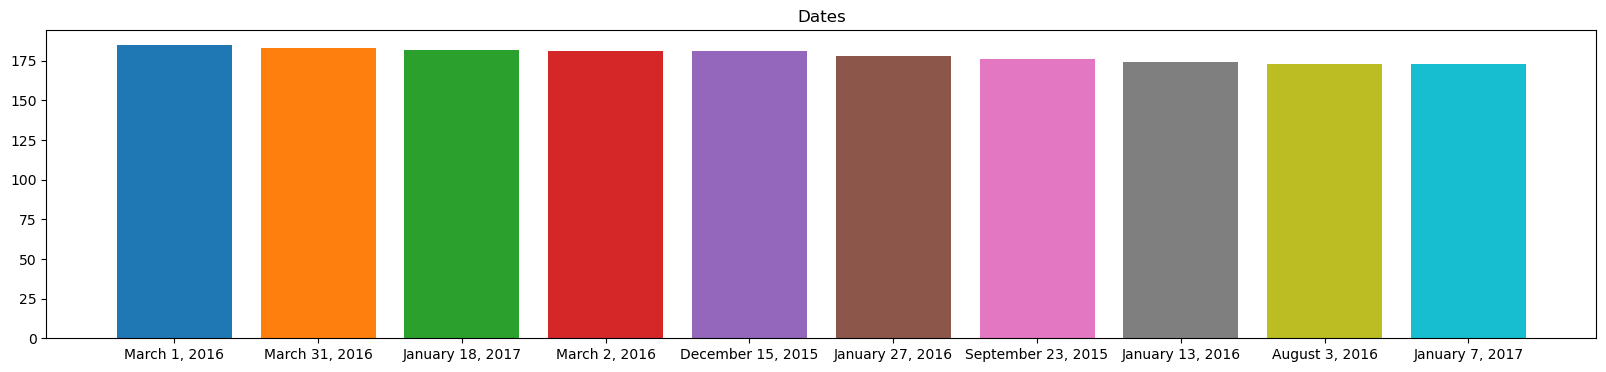

In [9]:
df.head()
z =df['date'].value_counts()[:10] #   barabar ba:    z = df.nlargest(10,'date')
plt.figure(figsize=(20,4))
for i in tqdm(range(10)):
    label = z.index[i]
    value = z.iloc[i]
    plt.bar(label,value)
# sns.countplot(data=z)
plt.title("Dates")
plt.show()



  0%|          | 0/5 [00:00<?, ?it/s]

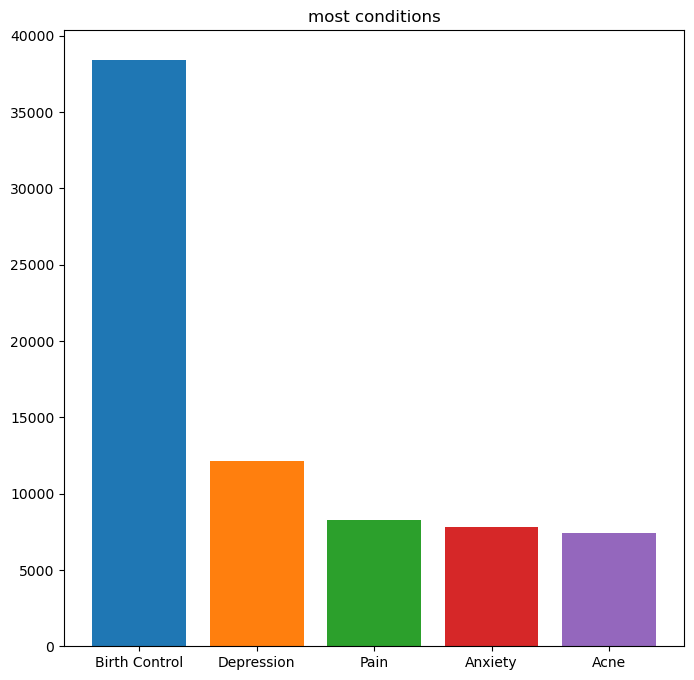

In [13]:
y = df['condition'].value_counts()[:5]
plt.figure(figsize=(8,8))
for i in tqdm(range(5)):
    label = y.index[i]
    value = y.iloc[i]
    plt.bar(label,value)
plt.title("most conditions")
plt.show()

Top 5 drugs

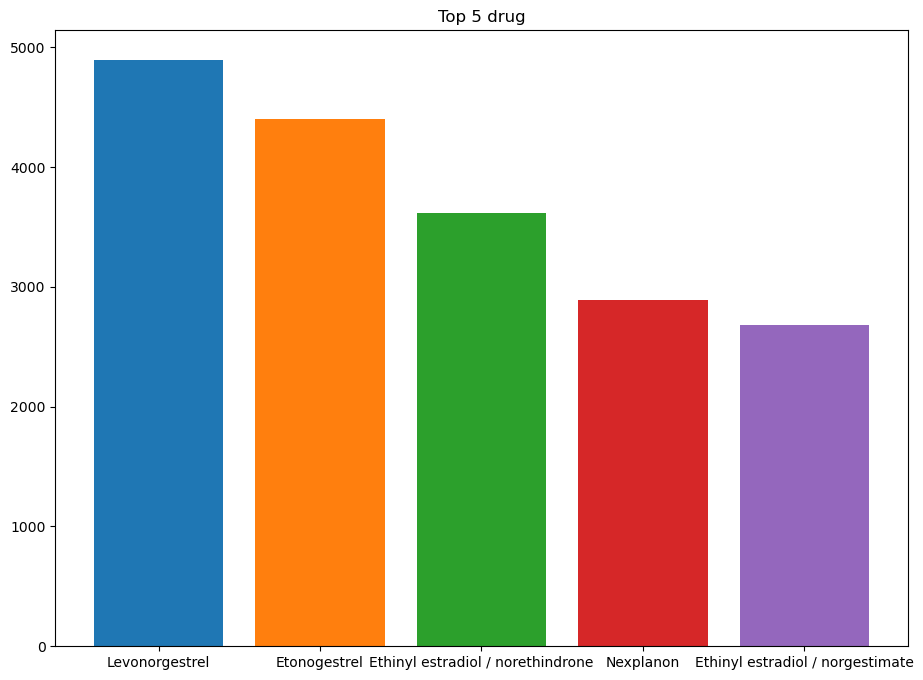

In [14]:
x =(df['drugName'].value_counts()[:5])
plt.figure(figsize=(11,8))
for i in range(5):
    label = x.index[i]
    value = x.iloc[i]
    plt.bar(label,value)
plt.title("Top 5 drug")
plt.show()

## wordcloud


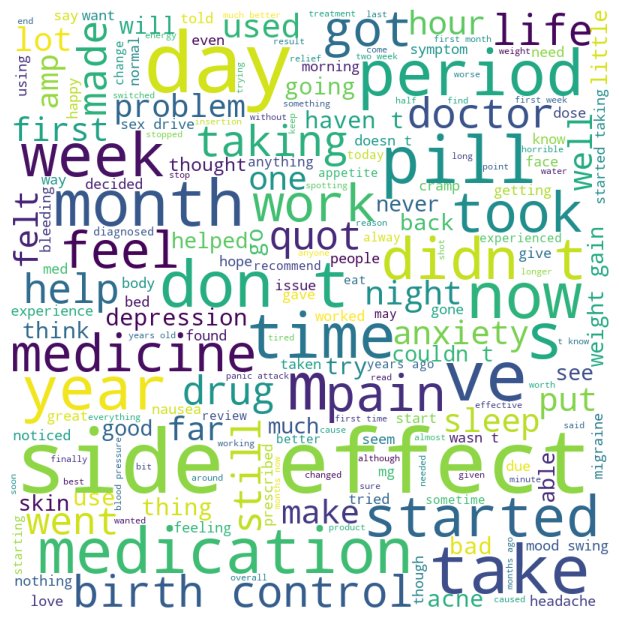

In [26]:
comment_words = ' '.join(df['review'].str.lower())

# Step 2: Generate the WordCloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=STOPWORDS,
                      min_font_size=10).generate(comment_words)

# Step 3: Plot the WordCloud image
plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
#Another way:
# comment_words = ''
# stopwords = set(STOPWORDS)
 
# # iterate through the csv file
# for val in df['review']:
     

#     val = str(val)
#     tokens = val.split()
     
#     # Converts each token into lowercase
#     for i in range(len(tokens)):
#         tokens[i] = tokens[i].lower()
     
#     comment_words += " ".join(tokens)+" "
 
# wordcloud = WordCloud(width = 800, height = 800,
#                 background_color ='white',
#                 stopwords = stopwords,
#                 min_font_size = 10).generate(comment_words)
 
# # plot the WordCloud image                       
# plt.figure(figsize = (6, 6), facecolor = None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)
 
# plt.show()